In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df_clean=df.drop(columns=['Address'])

In [5]:
df_clean

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [6]:
df_clean.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
Y = df['Price'] # This is the same as


# default split ratio is 25% for test set
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 1)

In [8]:
# import model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

# fit out linear model to the train set data
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# print the intercept and coefficients
print(linReg.intercept_)
print(linReg.coef_)

-2634496.578003766
[2.16128400e+01 1.65199115e+05 1.20215153e+05 2.37446107e+03
 1.51476862e+01]


In [10]:
y_hat = linReg.predict(x_test)
print(y_hat)

[1553812.58983384 1581416.30701123  942589.48741742 ... 1207879.98146081
  935043.10393389 1826148.29675121]


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_hat) 

10614401834.409979

In [12]:
r2_score(y_test, y_hat)

0.9198127436987775

In [13]:
df_clean['Price']=df_clean['Price']/1000000

In [14]:
df_clean.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617
4,59982.197226,5.040555,7.839388,4.23,26354.109472,0.630943


In [15]:
df_clean.loc[df_clean['Price']<=1.3,'Price']=0
df_clean.loc[(df_clean['Price']>1.3),'Price']=1

In [16]:
df_clean

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,0.0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,0.0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,0.0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,0.0
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,0.0
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.0
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,0.0
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,0.0


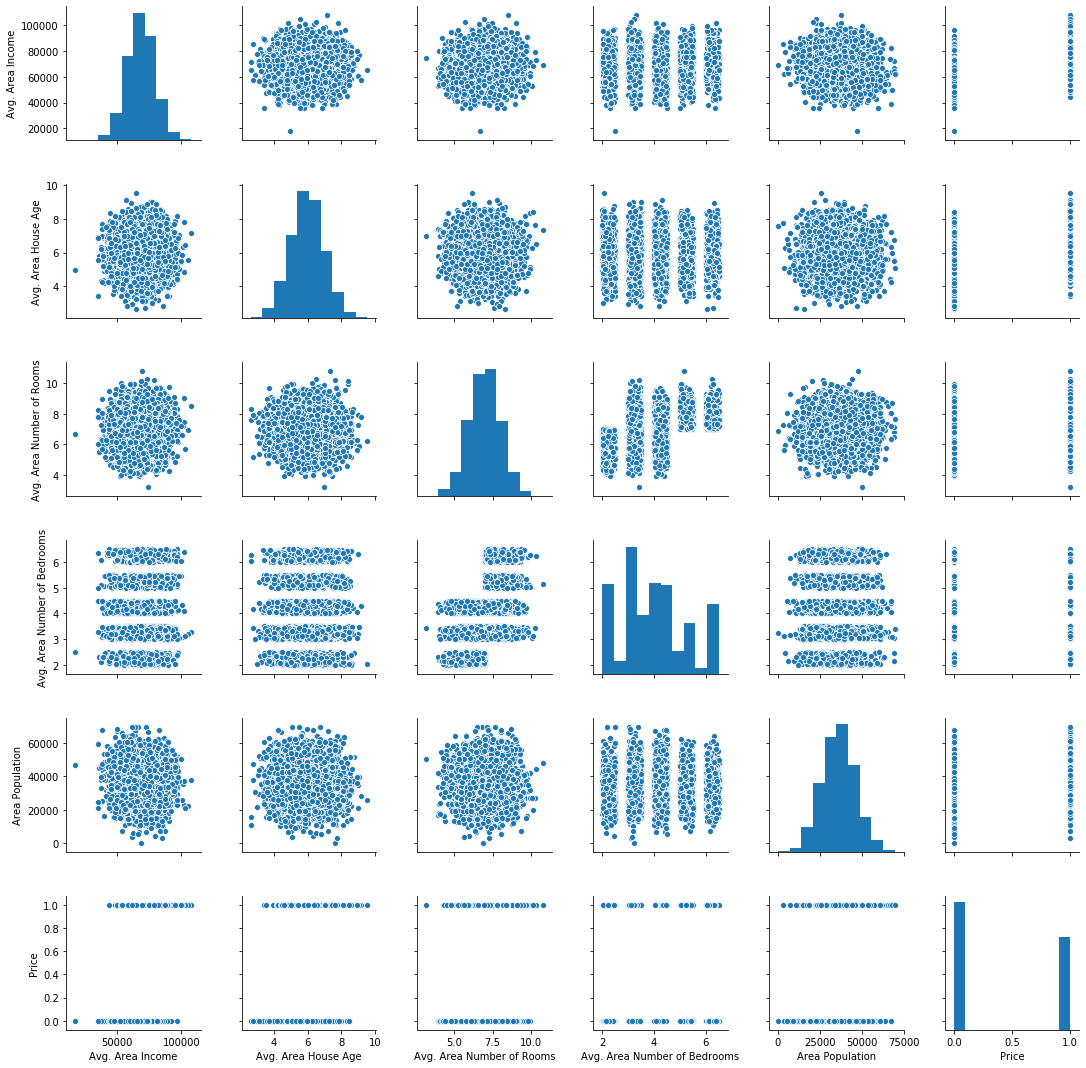

In [17]:
import seaborn as sb
sb.pairplot(df_clean)  # Show different levels of a categorical variable by the color of plot elements
plt.show()

In [18]:
from sklearn.decomposition import PCA

component_var = {}
for i in range(1, 6):
    pca = PCA(n_components=i)
    res = pca.fit(X)
    component_var[i] = sum(pca.explained_variance_ratio_)
print(component_var)

{1: 0.5364445052374015, 2: 0.9999999834238922, 3: 0.9999999923599038, 4: 0.9999999969944166, 5: 0.9999999999999999}


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf.head()

,PC1,PC2
0,-12355.342314,11769.414346
1,-10150.513499,-5176.603162
2,7330.647488,101.398710
3,4997.888602,2427.138669
4,7450.533529,10709.327261


In [20]:
finalDf = pd.concat([principalDf, df_clean[['Price']]], axis = 1)

In [21]:
finalDf

,PC1,PC2,Price
0,-12355.342314,11769.414346,0.0
1,-10150.513499,-5176.603162,1.0
2,7330.647488,101.398710,0.0
3,4997.888602,2427.138669,0.0
4,7450.533529,10709.327261,0.0
...,...,...,...
4995,6475.361556,14138.563133,0.0
4996,-11025.043260,9373.784824,1.0
4997,4836.019245,3459.612871,0.0
4998,1300.454251,-6356.577198,0.0


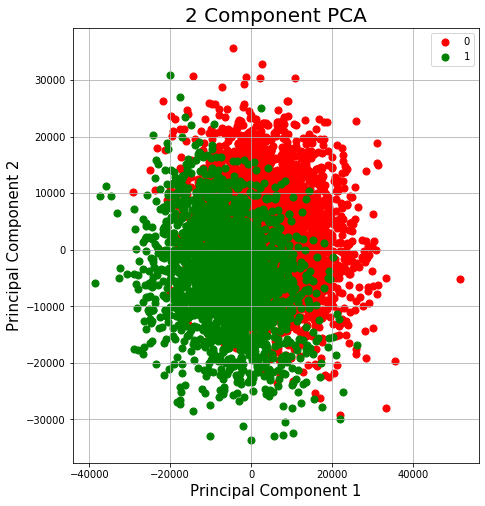

In [22]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [ 0, 1]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Price'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

In [23]:
X = finalDf.iloc[:,:-1]
y = finalDf[['Price']]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [25]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_hat = linReg.predict(X_test)

In [27]:
mean_squared_error(y_test, y_hat) 

0.16365321658305185

In [28]:
r2_score(y_test, y_hat)

0.32729403400642954